In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils as ut

from IPython.display import display

# Normalise across algos

## With NOTEARS

In [2]:
bench_all = pd.read_csv('./results/sim/joint_benchmarks.csv', index_col=0)
bench_all['id'] = bench_all.apply(lambda x: x['id'].upper(), axis=1)

df_def = ut.def_h('../config/algos_repo.json', './results/sim')
df_def['id'] = df_def.apply(lambda x: x['id'].upper(), axis=1)
df_best = ut.best_h(bench_all)
df_worst = ut.worst_h(bench_all)

df_def['quality'] = 'default'
df_best['quality'] = 'best'
df_worst['quality'] = 'worst'

df_final = pd.concat([df_def, df_best, df_worst], axis=0)
df_final = df_final.reset_index()

df_final['SHD'] = df_final.groupby(['graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n'])['SHD_pattern'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
df_mean = df_final.groupby(['id', 'graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n', 'quality'], as_index=False)['SHD'].mean()

df_def = df_mean.loc[df_mean['quality'] == 'default'].reset_index()
df_best = df_mean.loc[df_mean['quality'] == 'best'].reset_index()
df_worst = df_mean.loc[df_mean['quality'] == 'worst'].reset_index()

df_bd = df_def.copy()
df_bd['change'] = 'best_default'
df_bd['delta_SHD'] = df_def['SHD'] - df_best['SHD']

df_dw = df_def.copy()
df_dw['change'] = 'default_worst'
df_dw['delta_SHD'] = df_worst['SHD'] - df_def['SHD']

df_diff = pd.concat([df_bd, df_dw], axis=0)

/home/damian/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (24,26,27,28,29,33,34,39,41,42,43,44,45,47,48,57,58,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/damian/code/benchpress-dm/hyperparams/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['id'] = df['id'].unique()[0]


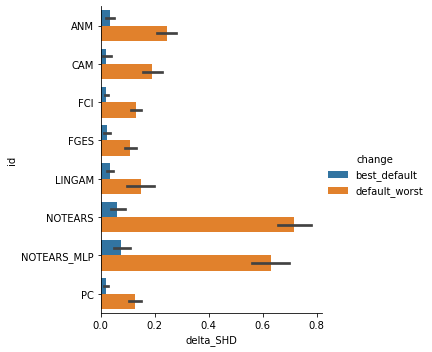

In [45]:
sns.catplot(data=df_diff, x='delta_SHD', y='id', hue='change', kind='bar', orient='h')

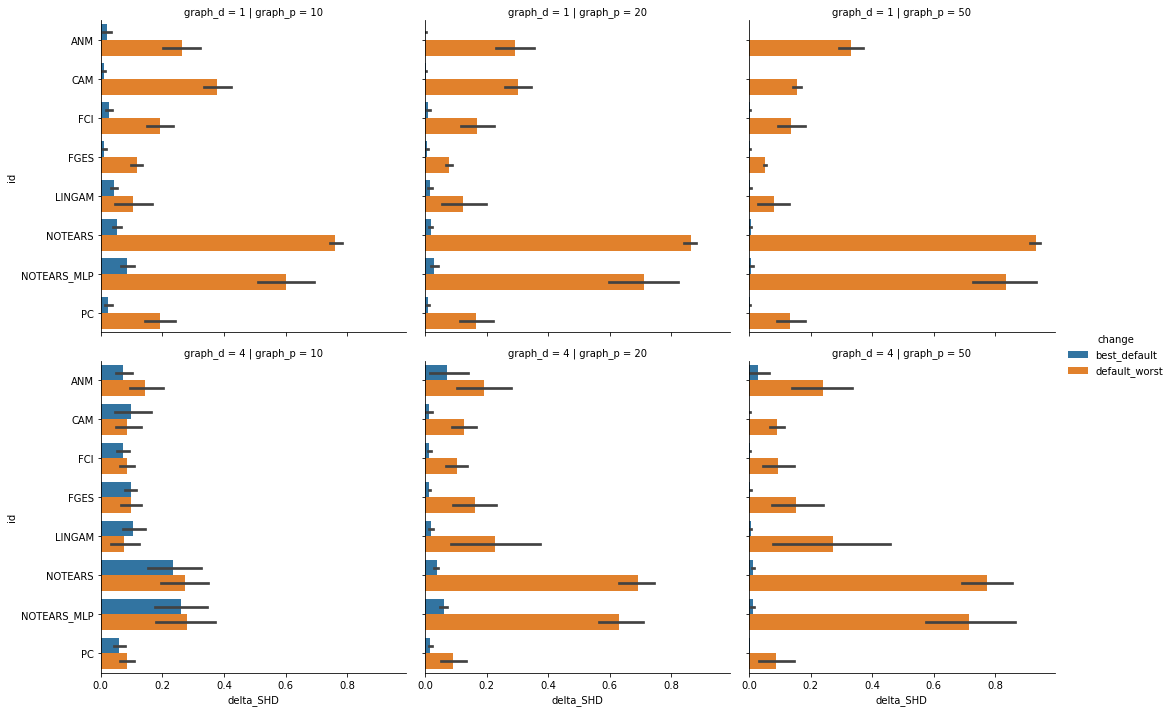

In [46]:
sns.catplot(data=df_diff, x='delta_SHD', y='id', hue='change', row='graph_d', col='graph_p', kind='bar', orient='h')

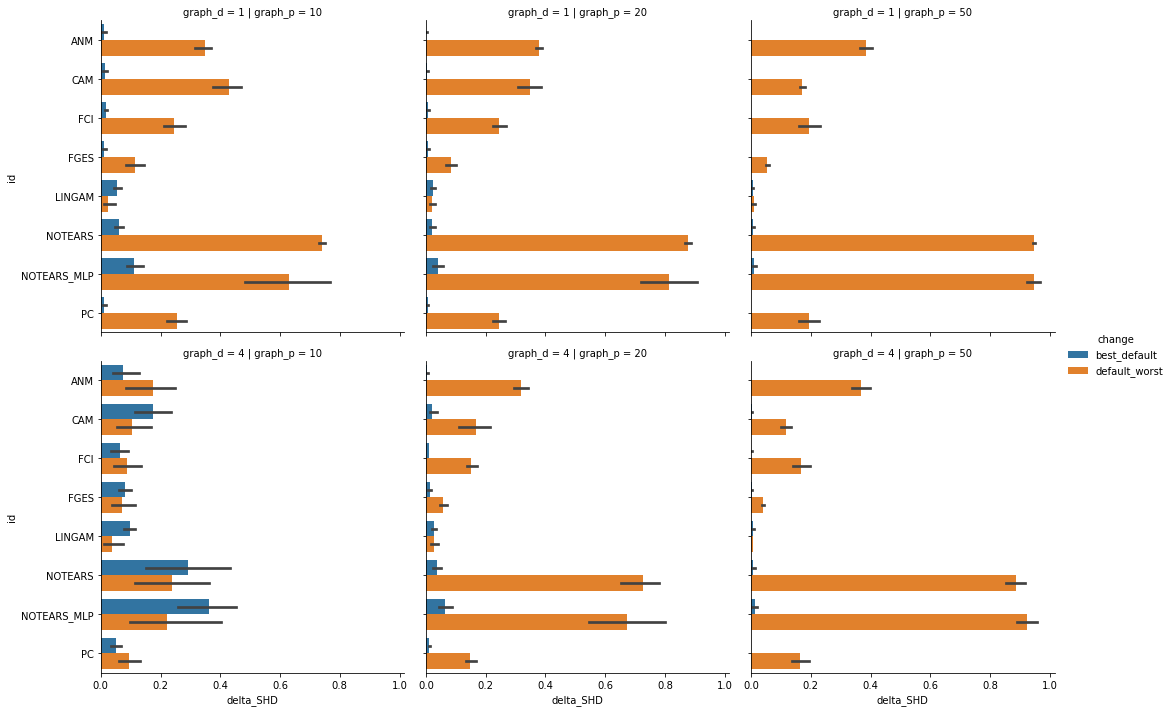

In [47]:
df_sel = df_diff.loc[df_diff['data_sem'] == 'gp']
sns.catplot(data=df_sel, x='delta_SHD', y='id', hue='change', row='graph_d', col='graph_p', kind='bar', orient='h')

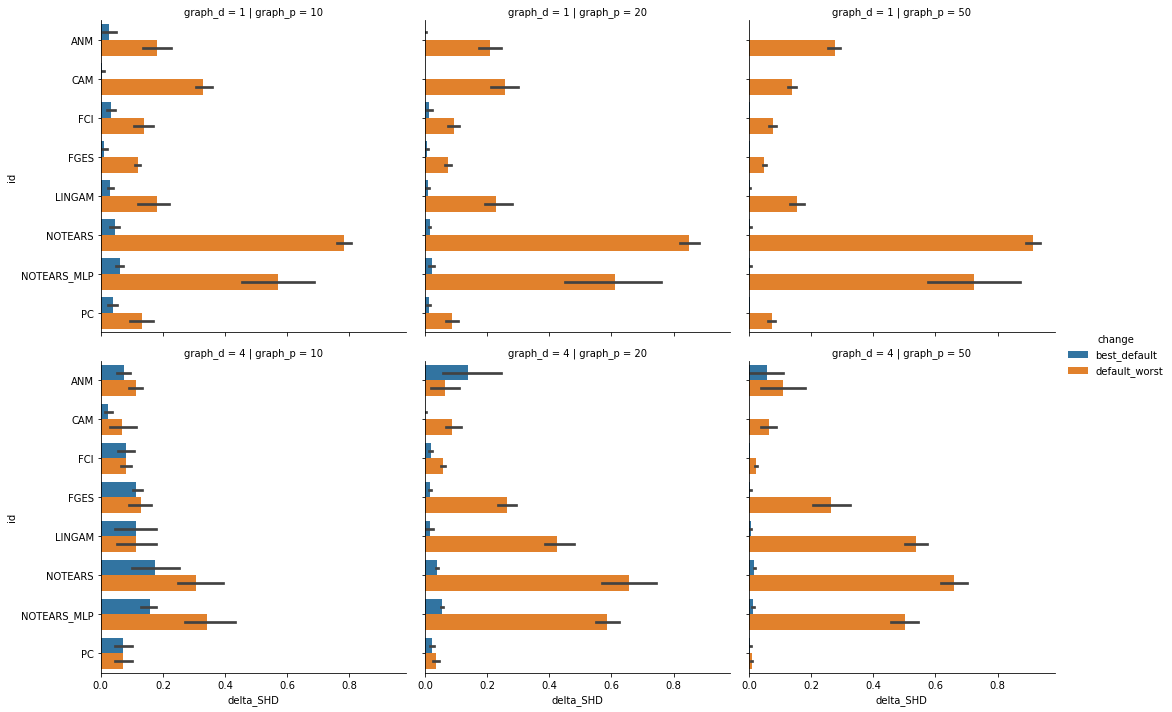

In [48]:
df_sel = df_diff.loc[df_diff['data_sem'] == 'gumbel']
sns.catplot(data=df_sel, x='delta_SHD', y='id', hue='change', row='graph_d', col='graph_p', kind='bar', orient='h')

## Without NOTEARS

In [6]:
bench_all = pd.read_csv('./results/sim/joint_benchmarks.csv', index_col=0)
bench_all['id'] = bench_all.apply(lambda x: x['id'].upper(), axis=1)

df_def = ut.def_h('../config/algos_repo.json', './results/sim')
df_def['id'] = df_def.apply(lambda x: x['id'].upper(), axis=1)
df_best = ut.best_h(bench_all)
df_worst = ut.worst_h(bench_all)

df_def['quality'] = 'default'
df_best['quality'] = 'best'
df_worst['quality'] = 'worst'

df_final = pd.concat([df_def, df_best, df_worst], axis=0)
df_final = df_final.reset_index()

# Filter out both NOTEARS
df_final = df_final[~df_final['id'].str.contains('NOTEARS')]

df_final['SHD'] = df_final.groupby(['graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n'])['SHD_pattern'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
df_mean = df_final.groupby(['id', 'graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n', 'quality'], as_index=False)['SHD'].mean()

df_def = df_mean.loc[df_mean['quality'] == 'default'].reset_index()
df_best = df_mean.loc[df_mean['quality'] == 'best'].reset_index()
df_worst = df_mean.loc[df_mean['quality'] == 'worst'].reset_index()

df_bd = df_def.copy()
df_bd['change'] = 'best_default'
df_bd['delta_SHD'] = df_def['SHD'] - df_best['SHD']

df_dw = df_def.copy()
df_dw['change'] = 'default_worst'
df_dw['delta_SHD'] = df_worst['SHD'] - df_def['SHD']

df_diff = pd.concat([df_bd, df_dw], axis=0)

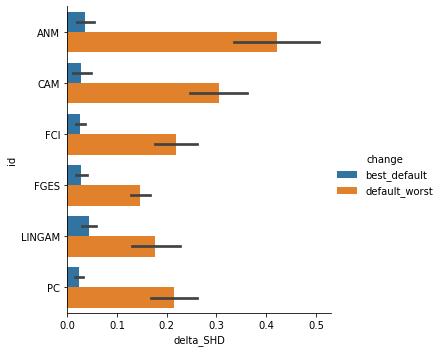

In [7]:
sns.catplot(data=df_diff, x='delta_SHD', y='id', hue='change', kind='bar', orient='h')

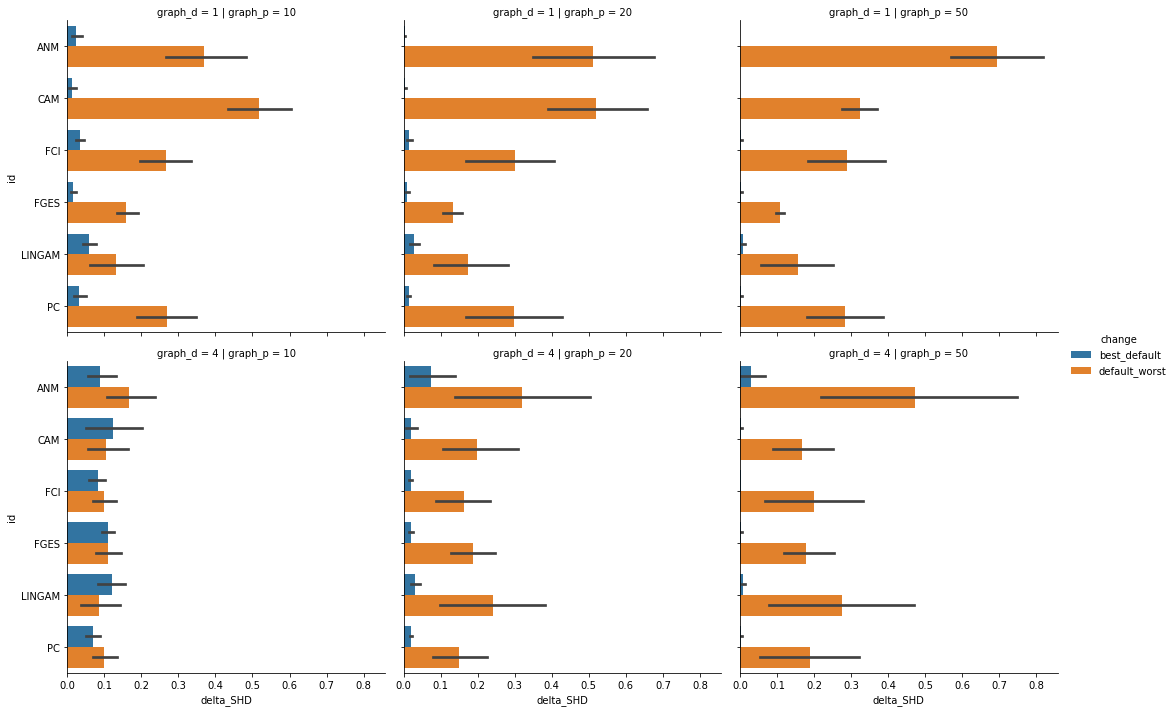

In [8]:
sns.catplot(data=df_diff, x='delta_SHD', y='id', hue='change', row='graph_d', col='graph_p', kind='bar', orient='h')

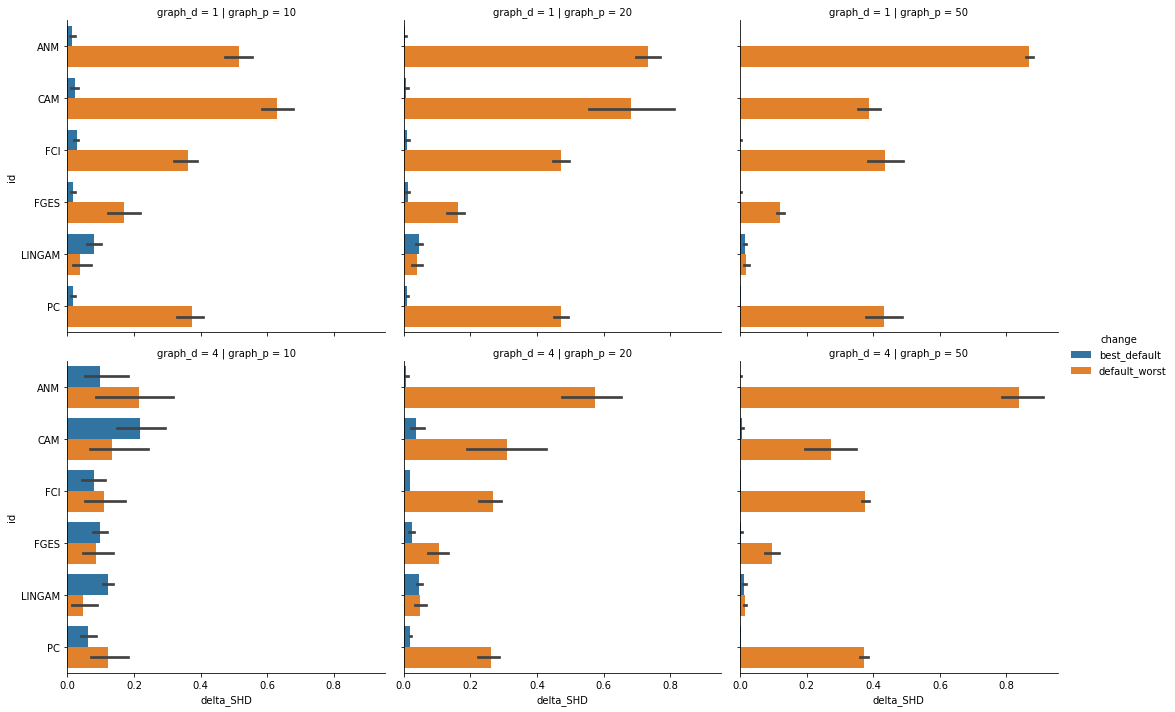

In [9]:
df_sel = df_diff.loc[df_diff['data_sem'] == 'gp']
sns.catplot(data=df_sel, x='delta_SHD', y='id', hue='change', row='graph_d', col='graph_p', kind='bar', orient='h')

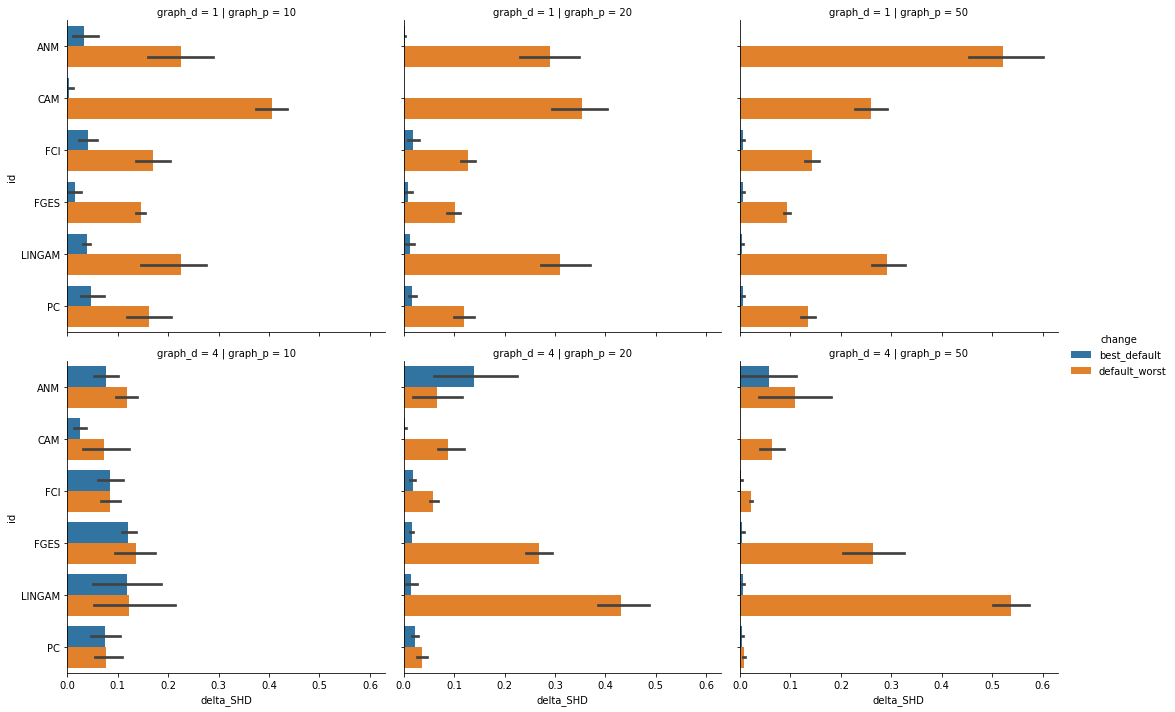

In [10]:
df_sel = df_diff.loc[df_diff['data_sem'] == 'gumbel']
sns.catplot(data=df_sel, x='delta_SHD', y='id', hue='change', row='graph_d', col='graph_p', kind='bar', orient='h')

# Normalise per algo

In [2]:
bench_all = pd.read_csv('./results/sim/joint_benchmarks.csv', index_col=0)
bench_all['id'] = bench_all.apply(lambda x: x['id'].upper(), axis=1)

df_def = ut.def_h('../config/algos_repo.json', './results/sim')
df_def['id'] = df_def.apply(lambda x: x['id'].upper(), axis=1)
df_best = ut.best_h(bench_all)
df_worst = ut.worst_h(bench_all)

df_def['quality'] = 'default'
df_best['quality'] = 'best'
df_worst['quality'] = 'worst'

df_final = pd.concat([df_def, df_best, df_worst], axis=0)
df_final = df_final.reset_index()

df_final['SHD'] = df_final.groupby(['id', 'graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n'])['SHD_pattern'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
df_mean = df_final.groupby(['id', 'graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n', 'quality'], as_index=False)['SHD'].mean()

df_def = df_mean.loc[df_mean['quality'] == 'default'].reset_index()
df_best = df_mean.loc[df_mean['quality'] == 'best'].reset_index()
df_worst = df_mean.loc[df_mean['quality'] == 'worst'].reset_index()

df_bd = df_def.copy()
df_bd['change'] = 'best_default'
df_bd['delta_SHD'] = df_def['SHD'] - df_best['SHD']

df_dw = df_def.copy()
df_dw['change'] = 'default_worst'
df_dw['delta_SHD'] = df_worst['SHD'] - df_def['SHD']

df_diff = pd.concat([df_bd, df_dw], axis=0)

/home/damian/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (24,26,27,28,29,33,34,39,41,42,43,44,45,47,48,57,58,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/damian/code/benchpress-dm/hyperparams/utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['id'] = df['id'].unique()[0]


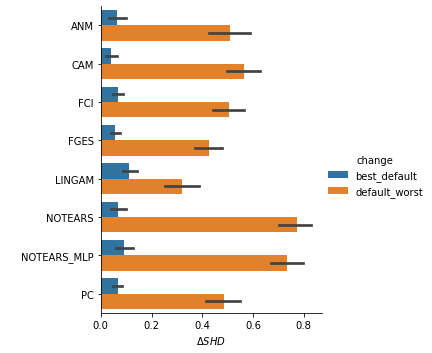

In [8]:
sns.catplot(data=df_diff, x='delta_SHD', y='id', hue='change', kind='bar', orient='h').set(xlabel='$\Delta {SHD}$', ylabel=' ')

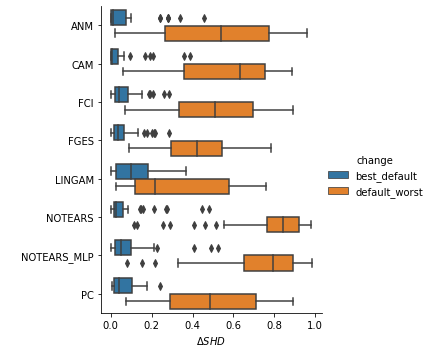

In [9]:
sns.catplot(data=df_diff, x='delta_SHD', y='id', hue='change', kind='box', orient='h').set(xlabel='$\Delta {SHD}$', ylabel=' ')

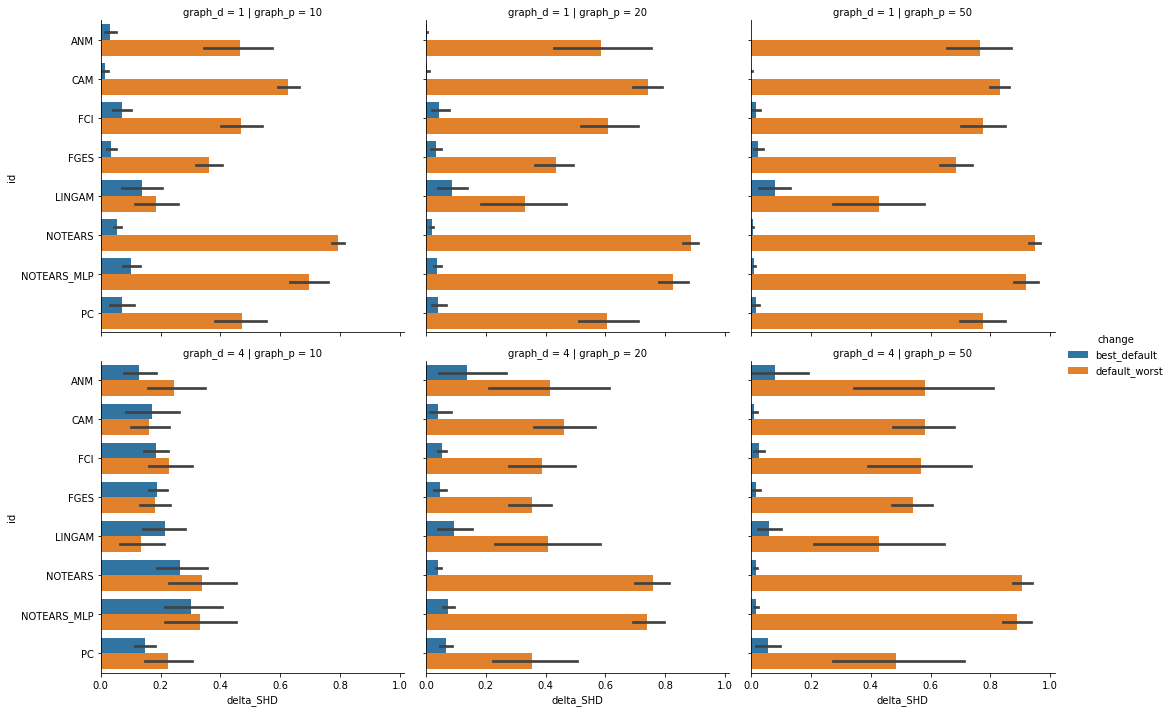

In [13]:
sns.catplot(data=df_diff, x='delta_SHD', y='id', hue='change', row='graph_d', col='graph_p', kind='bar', orient='h')

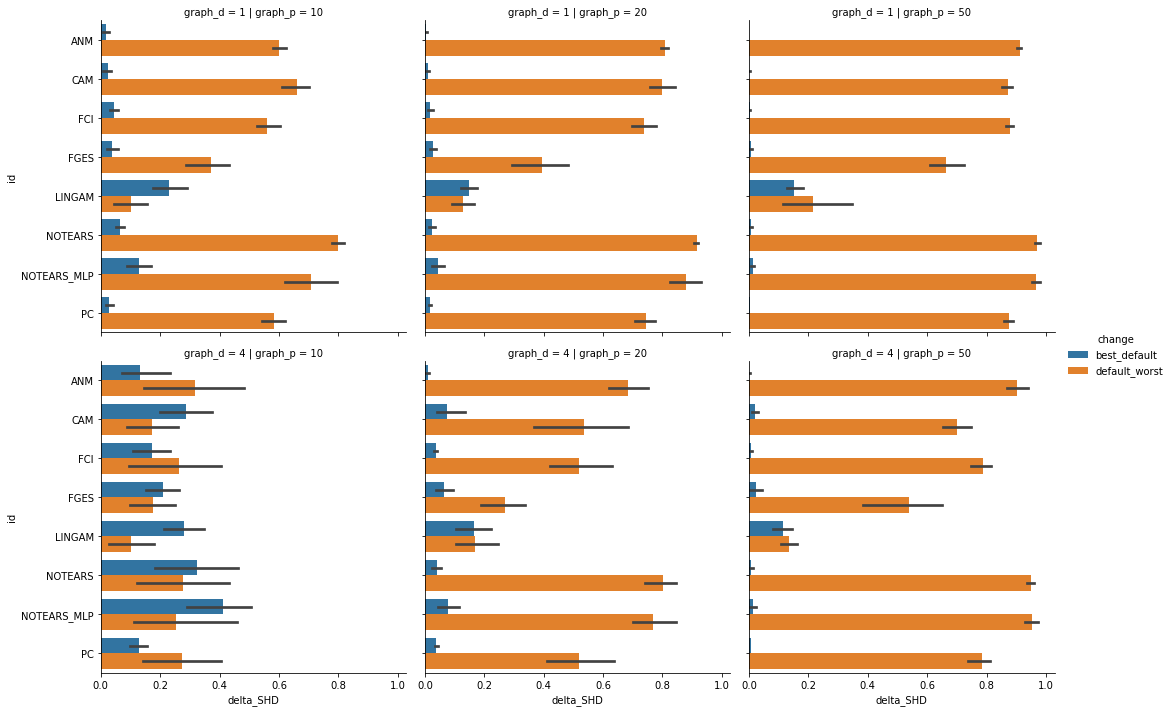

In [14]:
df_sel = df_diff.loc[df_diff['data_sem'] == 'gp']
sns.catplot(data=df_sel, x='delta_SHD', y='id', hue='change', row='graph_d', col='graph_p', kind='bar', orient='h')

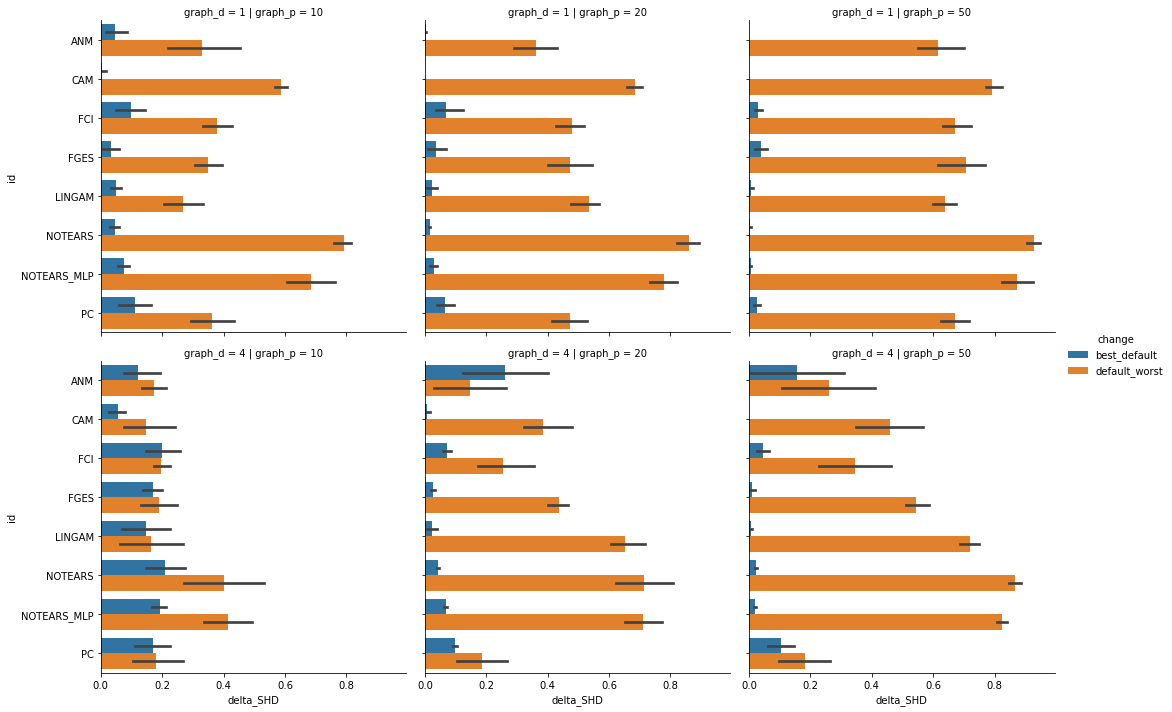

In [15]:
df_sel = df_diff.loc[df_diff['data_sem'] == 'gumbel']
sns.catplot(data=df_sel, x='delta_SHD', y='id', hue='change', row='graph_d', col='graph_p', kind='bar', orient='h')